In [1]:
import tensorflow as tf

In [2]:
train_dir = './dataset/seg_train'
test_dir = './dataset/seg_test'

In [3]:
train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir , image_size=(75, 75) , batch_size=32 , label_mode='int')
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir , image_size=(75, 75) , batch_size=32 , label_mode='int')

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [4]:
#normalization_layer = tf.keras.layers.Rescaling(1. / 255)
#train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
#test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [5]:
pretrained_model =tf.keras.applications.ResNet50(include_top=False,
                                   input_shape=(75,75,3),
                                   pooling='avg',
                                   classes=6,
                                   weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 77s 162ms/step - accuracy: 0.7734 - loss: 0.6534 - val_accuracy: 0.8503 - val_loss: 0.4095
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 62s 141ms/step - accuracy: 0.8710 - loss: 0.3486 - val_accuracy: 0.8543 - val_loss: 0.4076
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 63s 142ms/step - accuracy: 0.8964 - loss: 0.2844 - val_accuracy: 0.8583 - val_loss: 0.3969
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 65s 148ms/step - accuracy: 0.9071 - loss: 0.2446 - val_accuracy: 0.8540 - val_loss: 0.4073
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 63s 144ms/step - accuracy: 0.9224 - loss: 0.2014 - val_accuracy: 0.8513 - val_loss: 0.4607
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 63s 145ms/step - accuracy: 0.9309 - loss: 0.1807 - val_accuracy: 0.8590 - val_loss: 0.4598
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 65s 147ms/step - accuracy: 0.9457 - loss: 0.1485 - val_accuracy: 0.8490 - val_loss: 0.5325
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 63s 144ms/step - accuracy: 0.9507 - loss: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


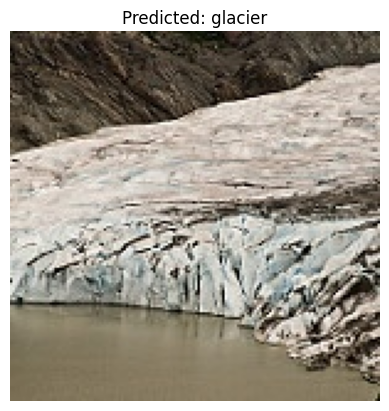

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


image_path = './dataset/seg_pred/seg_pred/38.jpg'  

img = Image.open(image_path).resize((75,75))  
img_array = np.array(img) 
img_array = np.expand_dims(img_array, axis=0) 


predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)

index_obj ={
    0 : 'Building',
    1 : 'forest',
    2 : 'glacier',
    3 : 'mountain',
    4 : 'sea',
    5 : 'street'
}

plt.imshow(Image.open(image_path))
plt.title(f"Predicted: {index_obj[predicted_class[0]]}")
plt.axis('off')
plt.show()
